In [20]:
import matplotlib.pyplot as plt
import os, json
import numpy as np
import pandas as pd
import seaborn as sns

In [21]:
datadir = "./results/"
search_files = [datadir + x for x in os.listdir(datadir) if "search" in x]
upload_files = [datadir + x for x in os.listdir(datadir) if "upload" in x]
gsi_search = [x for x in search_files if "gsi" in x]
glove25_gsi = [x for x in search_files if "glove-25" in x and "gsi" in x]
glove25_gsi = sorted(glove25_gsi, key=lambda x: int(x.split('-')[1]))
glove100_gsi = [x for x in search_files if "glove-100" in x and "gsi" in x]
glove100_gsi = sorted(glove100_gsi, key=lambda x: int(x.split('-')[1]))
deep96_gsi = [x for x in search_files if "deep" in x and "gsi" in x]
deep96_gsi = sorted(deep96_gsi, key=lambda x: int(x.split('-')[1]))
weaviate_files = [datadir + x for x in os.listdir('./results') if "weaviate" in x]
weaviate_search = [x for x in weaviate_files if "search" in x]

## Results

In [22]:
def parse_gsi_search(fname):
    # filename parsing
    tmp = fname.split('-')
    search_type = tmp[2]
    # get nbits, dims, and dataset
    nbits, dim, dataset = None, None, None
    for i, x in enumerate(tmp):
        if x.isnumeric():
            if not nbits:
                nbits = int(x)
            elif not dim:
                dim = int(x)
                if tmp[i-1] == "image":
                    dataset = f"{tmp[i-2]}-{tmp[i-1]}"
                else:
                    dataset = f"{tmp[i-1]}"
    row = {'vdb': 'gsi', 'search_type': search_type, 'nbits': nbits, 'dataset': dataset, 'dim': dim}
    # json file parse
    f = open(fname)
    tmp = json.load(f)
    row.update(tmp['results'])

    return row

### Search

In [23]:
columns = ['vdb', 'search_type', 'nbits', 'dataset', 'dim', 'total_time', 'mean_time',\
             'mean_precisions', 'std_time', 'min_time', 'max_time', 'rps', 'p95_time', 'p99_time',\
             'precisions', 'latencies']
gsi_df = pd.DataFrame(columns=columns)
for fname in gsi_search:
    gsi_df.loc[len(gsi_df), :] = parse_gsi_search(fname)
gsi_df.head()

,vdb,search_type,nbits,dataset,dim,total_time,mean_time,mean_precisions,std_time,min_time,max_time,rps,p95_time,p99_time,precisions,latencies
0,gsi,hnsw,64,glove,100,163.630274,0.016236,0.6096,0.003425,0.011191,0.116398,61.113385,0.019312,0.028225,"[0.2, 0.5, 0.5, 0.1, 0.9, 0.6, 0.9, 0.1, 1.0, ...","[0.026896735653281212, 0.0188307948410511, 0.0..."
1,gsi,hnsw,512,deep-image,96,161.980567,0.016071,0.66816,0.003831,0.010963,0.12319,61.735801,0.018089,0.026562,"[0.9, 1.0, 0.5, 1.0, 0.4, 1.0, 0.2, 0.5, 0.8, ...","[0.02695783833041787, 0.02273357519879937, 0.0..."
2,gsi,flat,768,glove,100,214.73454,0.021342,0.16523,0.002969,0.016636,0.12089,46.569127,0.023991,0.02596,"[0.0, 0.0, 0.4, 0.0, 0.4, 0.5, 0.5, 0.0, 0.4, ...","[0.02792276069521904, 0.02274819789454341, 0.0..."
3,gsi,hnsw,768,deep-image,96,158.133165,0.015684,0.66816,0.002783,0.009566,0.1387,63.237841,0.017713,0.019193,"[0.9, 1.0, 0.5, 1.0, 0.4, 1.0, 0.2, 0.5, 0.8, ...","[0.021964848041534424, 0.013925810344517231, 0..."
4,gsi,flat,256,deep-image,96,298.947454,0.029741,0.99537,0.003924,0.024422,0.155958,33.450695,0.031912,0.033271,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.03413561685010791, 0.025140448939055204, 0...."


In [24]:
tmp = gsi_df[['dataset', 'dim', 'search_type', 'nbits']].sort_values(by=['dataset', 'dim', 'search_type', 'nbits'])
tmp

,dataset,dim,search_type,nbits
9,deep-image,96,flat,64
20,deep-image,96,flat,128
4,deep-image,96,flat,256
11,deep-image,96,flat,512
7,deep-image,96,flat,768
25,deep-image,96,hnsw,64
13,deep-image,96,hnsw,128
27,deep-image,96,hnsw,256
1,deep-image,96,hnsw,512
3,deep-image,96,hnsw,768


Text(0.5, 1.0, 'GSI Flat Search / Latency vs Precision')

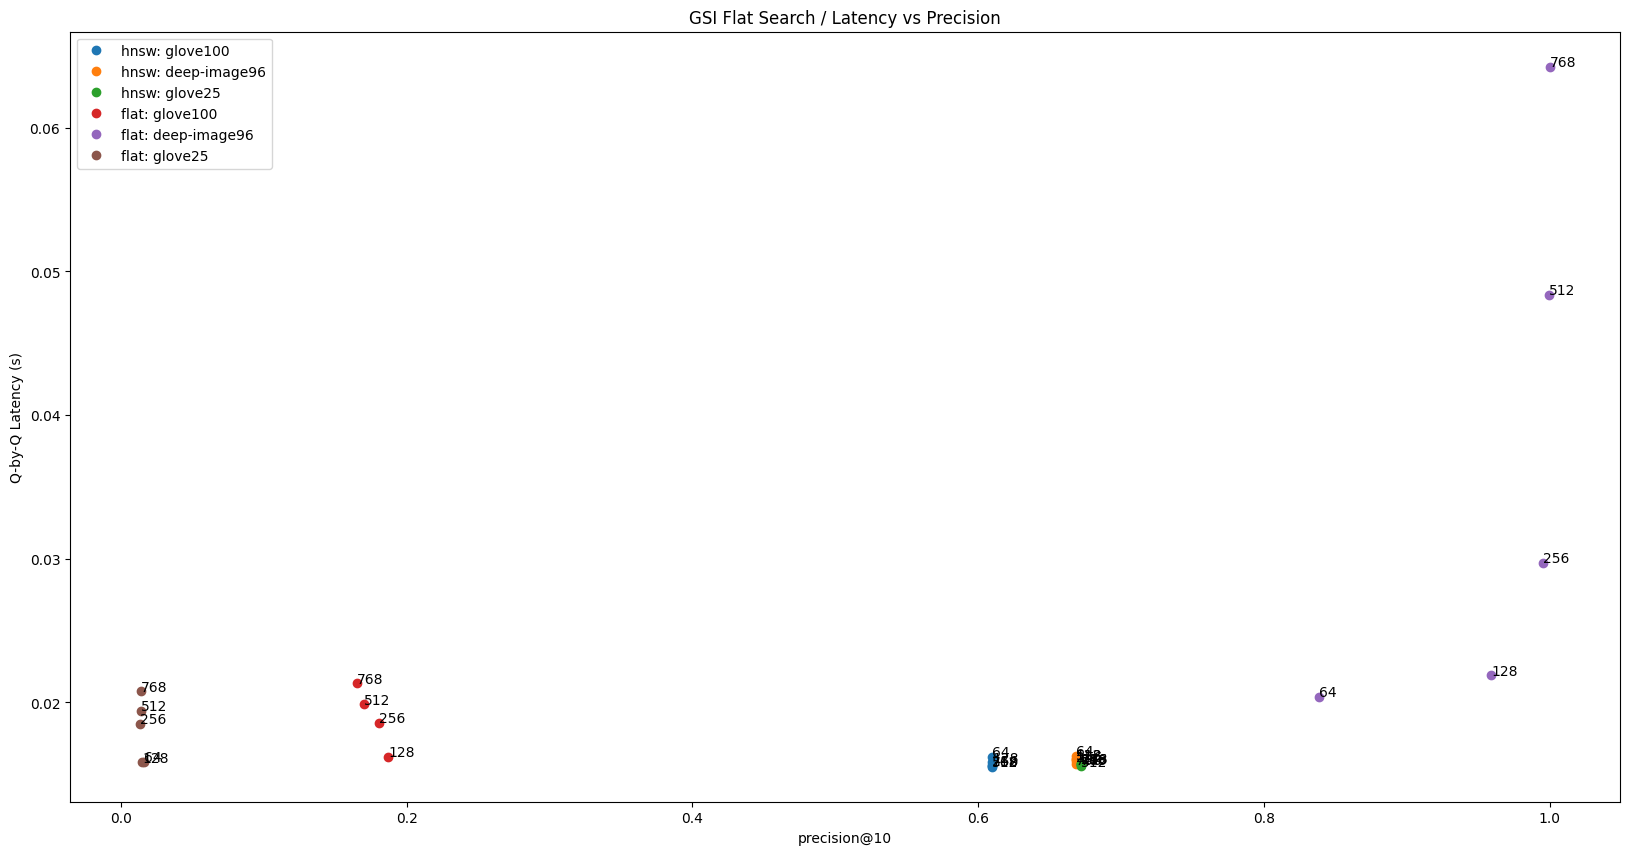

In [26]:
fig, ax = plt.subplots(figsize=(20,10))
# search_type, dataset, dim = "flat", "glove", 100
tmp = gsi_df.copy()
# tmp = df[df.search_type == search_type]
# tmp = tmp[tmp.dim == dim]
for types in tmp.search_type.unique().tolist():
    x = tmp[tmp.search_type == types]
    for dim in x.dim.unique().tolist():
        y = x[x.dim == dim]
        plt.plot(y.mean_precisions, y.mean_time,'o', label= f"{types}: {y.dataset.to_list()[0]}{dim}")
        for a, b, c in zip(y.mean_precisions, y.mean_time, y.nbits):
            plt.annotate(f"{c}", (a, b))

ax.legend()
ax.set_xlabel("precision@10")
ax.set_ylabel("Q-by-Q Latency (s)")
ax.set_title("GSI Flat Search / Latency vs Precision")



### Upload

In [6]:
hnsw_upload = [x for x in upload_files if "hnsw" in x]
hnsw_upload = sorted(hnsw_upload, key = lambda x: int(x.split('-')[1]))
hnsw_upload_glove = [x for x in hnsw_upload if "glove" in x]
hnsw_upload_glove

['./results/gsi-64-hnsw-glove-25-angular-upload-2023-10-16-22-27-22.json',
 './results/gsi-128-hnsw-glove-25-angular-upload-2023-10-16-22-30-16.json',
 './results/gsi-256-hnsw-glove-25-angular-upload-2023-10-16-22-33-10.json',
 './results/gsi-512-hnsw-glove-25-angular-upload-2023-10-16-22-36-04.json',
 './results/gsi-768-hnsw-glove-25-angular-upload-2023-10-16-22-38-56.json']

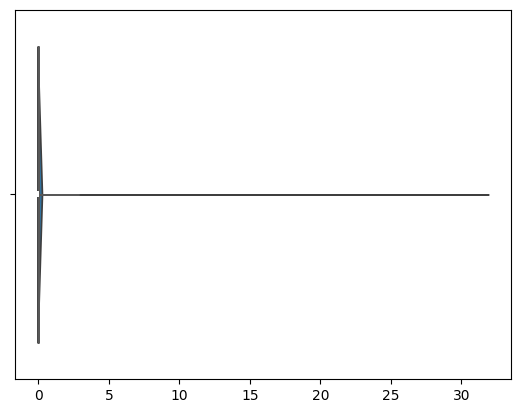

In [7]:
for file in hnsw_upload_glove:
    tmp = pd.read_json(file)
    sns.violinplot(tmp.results['latencies'], orient='h')

In [8]:
tmp = pd.Series(pd.read_json(hnsw_upload_glove[0]).results['latencies'])

<Axes: >

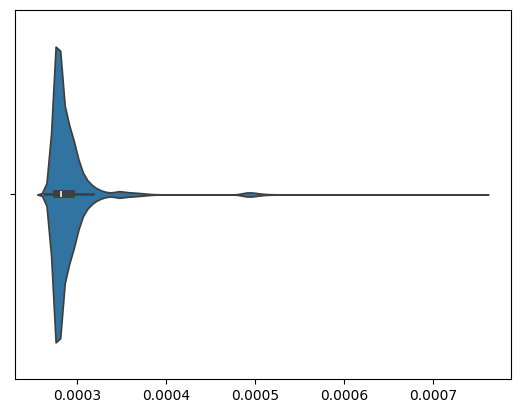

In [9]:
sns.violinplot(tmp[tmp < .0009], orient='h')

### weaviate stuff

In [36]:
def parse_weav_search(fname):
    # filename parsing
    tmp = fname.split('-')
    if tmp[6].isnumeric():
        m, efc, dataset, dim = int(tmp[2]), int(tmp[4]), tmp[5], int(tmp[6])
    else:
        m, efc, dataset, dim = int(tmp[2]), int(tmp[4]), f"{tmp[5]}-{tmp[6]}", int(tmp[7])
    row = {'vdb': 'weaviate', 'm':m, 'efc': efc, 'dataset': dataset, 'dim': dim}

    
    # json file parse
    f = open(fname)
    tmp = json.load(f)
    row.update(tmp['params'].pop('vectorIndexConfig'))
    row.update(tmp['params'])
    row.update(tmp['results'])
    return row

In [37]:
columns = ['vdb', 'm', 'efc', 'ef', 'dataset', 'dim', 'parallel', 'total_time', 'mean_time',\
             'mean_precisions', 'std_time', 'min_time', 'max_time', 'rps', 'p95_time', 'p99_time',\
             'precisions', 'latencies']
weav_df = pd.DataFrame(columns=columns)
for fname in weaviate_search:
    weav_df.loc[len(weav_df)] = parse_weav_search(fname)
weav_df = weav_df.sort_values(by=['m', 'efc', 'dim', 'ef']).reset_index(drop=True)
weav_df.parallel.fillna(0, inplace=True)

In [44]:
weav_df

,vdb,m,efc,ef,dataset,dim,parallel,total_time,mean_time,mean_precisions,std_time,min_time,max_time,rps,p95_time,p99_time,precisions,latencies
0,weaviate,16,128,64,glove,25,4.0,19.521903,0.007576,0.906589,0.002021,0.004825,0.039636,512.245141,0.009846,0.017404,"[0.9, 0.93, 0.96, 0.8, 0.92, 0.89, 0.96, 0.75,...","[0.010727678891271353, 0.010898445267230272, 0..."
1,weaviate,16,128,64,glove,25,2.0,38.706500,0.007569,0.906589,0.001671,0.005524,0.034040,258.354539,0.009258,0.016167,"[0.9, 0.93, 0.96, 0.8, 0.92, 0.89, 0.96, 0.83,...","[0.011440489906817675, 0.01077392790466547, 0...."
2,weaviate,16,128,64,glove,25,1.0,88.299481,0.008695,0.906589,0.001983,0.004489,0.121567,113.250949,0.010228,0.013070,"[0.9, 0.93, 0.96, 0.8, 0.92, 0.89, 0.96, 0.75,...","[0.013112276792526245, 0.011815553065389395, 0..."
3,weaviate,16,128,64,glove,25,8.0,9.717351,0.007586,0.906589,0.002736,0.004359,0.041164,1029.086994,0.014214,0.018910,"[0.92, 0.8, 0.96, 0.9, 0.93, 0.89, 0.83, 0.75,...","[0.0069328248500823975, 0.008996122982352972, ..."
4,weaviate,16,128,64,glove,25,100.0,3.363136,0.030861,0.906589,0.012516,0.008291,0.174545,2973.414988,0.049134,0.068511,"[0.96, 0.9, 0.93, 0.96, 0.92, 0.89, 0.8, 0.75,...","[0.02571441000327468, 0.029271858278661966, 0...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,weaviate,32,512,512,deep-image,96,100.0,3.966214,0.035396,0.995216,0.023076,0.009684,0.297360,2521.295920,0.085061,0.132167,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.02567954594269395, 0.026178599800914526, 0...."
189,weaviate,32,512,512,deep-image,96,4.0,37.897009,0.014927,0.995216,0.002937,0.006505,0.082273,263.873070,0.019196,0.021914,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.99, 1.0,...","[0.014111190102994442, 0.015150974970310926, 0..."
190,weaviate,32,512,512,deep-image,96,2.0,83.725830,0.016504,0.995216,0.002819,0.006734,0.053208,119.437454,0.020846,0.023145,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.99, 1.0,...","[0.02013540081679821, 0.021259200293570757, 0...."
191,weaviate,32,512,512,deep-image,96,8.0,17.043774,0.013392,0.995216,0.003415,0.005591,0.082949,586.724505,0.017561,0.026295,"[1.0, 1.0, 1.0, 1.0, 0.99, 1.0, 1.0, 1.0, 1.0,...","[0.012286537792533636, 0.017139712814241648, 0..."


In [46]:
tmp = weav_df[['m', 'efc', 'ef', 'dataset', 'dim', 'parallel']]
tmp[tmp.duplicated()]

,m,efc,ef,dataset,dim,parallel
41,16,128,64,glove,100,0.0
42,16,128,64,glove,100,0.0
43,16,128,64,glove,100,0.0
44,16,128,64,glove,100,0.0
46,16,128,128,glove,100,0.0
47,16,128,128,glove,100,0.0
48,16,128,128,glove,100,0.0
49,16,128,128,glove,100,0.0
51,16,128,256,glove,100,0.0
52,16,128,256,glove,100,0.0


In [34]:
weav_df.drop_duplicates()

TypeError: unhashable type: 'list'

In [9]:
weav_df.dim.value_counts()

dim
96     80
25     60
100    53
Name: count, dtype: int64

In [10]:
weav_df[weav_df.dim == 100]

,vdb,m,efc,ef,dataset,dim,parallel,total_time,mean_time,mean_precisions,std_time,min_time,max_time,rps,p95_time,p99_time,precisions,latencies
40,weaviate,16,128,64,glove,100,0.0,102.092794,0.010069,0.679277,0.001496,0.006051,0.037225,97.950106,0.012078,0.013467,"[0.4, 0.71, 0.8, 0.21, 0.5, 0.32, 0.92, 0.1, 0...","[0.011302451137453318, 0.011466100346297026, 0..."
41,weaviate,16,128,64,glove,100,0.0,99.049707,0.009771,0.679277,0.001470,0.006456,0.040348,100.959410,0.011643,0.012887,"[0.4, 0.71, 0.8, 0.21, 0.5, 0.32, 0.92, 0.1, 0...","[0.010689327027648687, 0.011642598081380129, 0..."
42,weaviate,16,128,64,glove,100,0.0,100.697887,0.009931,0.679277,0.001461,0.006117,0.037817,99.306949,0.011876,0.013099,"[0.4, 0.71, 0.8, 0.21, 0.5, 0.32, 0.92, 0.1, 0...","[0.009301808197051287, 0.009540601167827845, 0..."
43,weaviate,16,128,64,glove,100,0.0,99.672490,0.009830,0.679277,0.001498,0.006557,0.040747,100.328587,0.011791,0.013024,"[0.4, 0.71, 0.8, 0.21, 0.5, 0.32, 0.92, 0.1, 0...","[0.008966050110757351, 0.008489511907100677, 0..."
44,weaviate,16,128,64,glove,100,0.0,102.797537,0.010141,0.679277,0.001687,0.006722,0.064986,97.278595,0.012211,0.013926,"[0.4, 0.71, 0.8, 0.21, 0.5, 0.32, 0.92, 0.1, 0...","[0.01463013095781207, 0.013339608907699585, 0...."
45,weaviate,16,128,128,glove,100,0.0,101.974965,0.010060,0.712245,0.001364,0.006746,0.028229,98.063285,0.011847,0.013792,"[0.47, 0.76, 0.84, 0.26, 0.64, 0.39, 0.93, 0.1...","[0.010936394799500704, 0.011920458171516657, 0..."
46,weaviate,16,128,128,glove,100,0.0,101.324098,0.009995,0.712245,0.001374,0.006457,0.030734,98.693205,0.011894,0.013312,"[0.47, 0.76, 0.84, 0.26, 0.64, 0.39, 0.93, 0.1...","[0.010110686998814344, 0.010847854893654585, 0..."
47,weaviate,16,128,128,glove,100,0.0,101.740697,0.010038,0.712245,0.001544,0.006637,0.044386,98.289085,0.011982,0.013861,"[0.47, 0.76, 0.84, 0.26, 0.64, 0.39, 0.93, 0.1...","[0.010292262770235538, 0.011825283989310265, 0..."
48,weaviate,16,128,128,glove,100,0.0,101.925091,0.010055,0.712245,0.001450,0.006705,0.036915,98.111268,0.012053,0.013372,"[0.47, 0.76, 0.84, 0.26, 0.64, 0.39, 0.93, 0.1...","[0.011633634101599455, 0.01132966298609972, 0...."
49,weaviate,16,128,128,glove,100,0.0,103.772532,0.010230,0.712245,0.001488,0.006898,0.035843,96.364614,0.012189,0.013362,"[0.47, 0.76, 0.84, 0.26, 0.64, 0.39, 0.93, 0.1...","[0.01015073386952281, 0.011630933731794357, 0...."


Text(0, 0.5, 'Q-by-Q latency (s)')

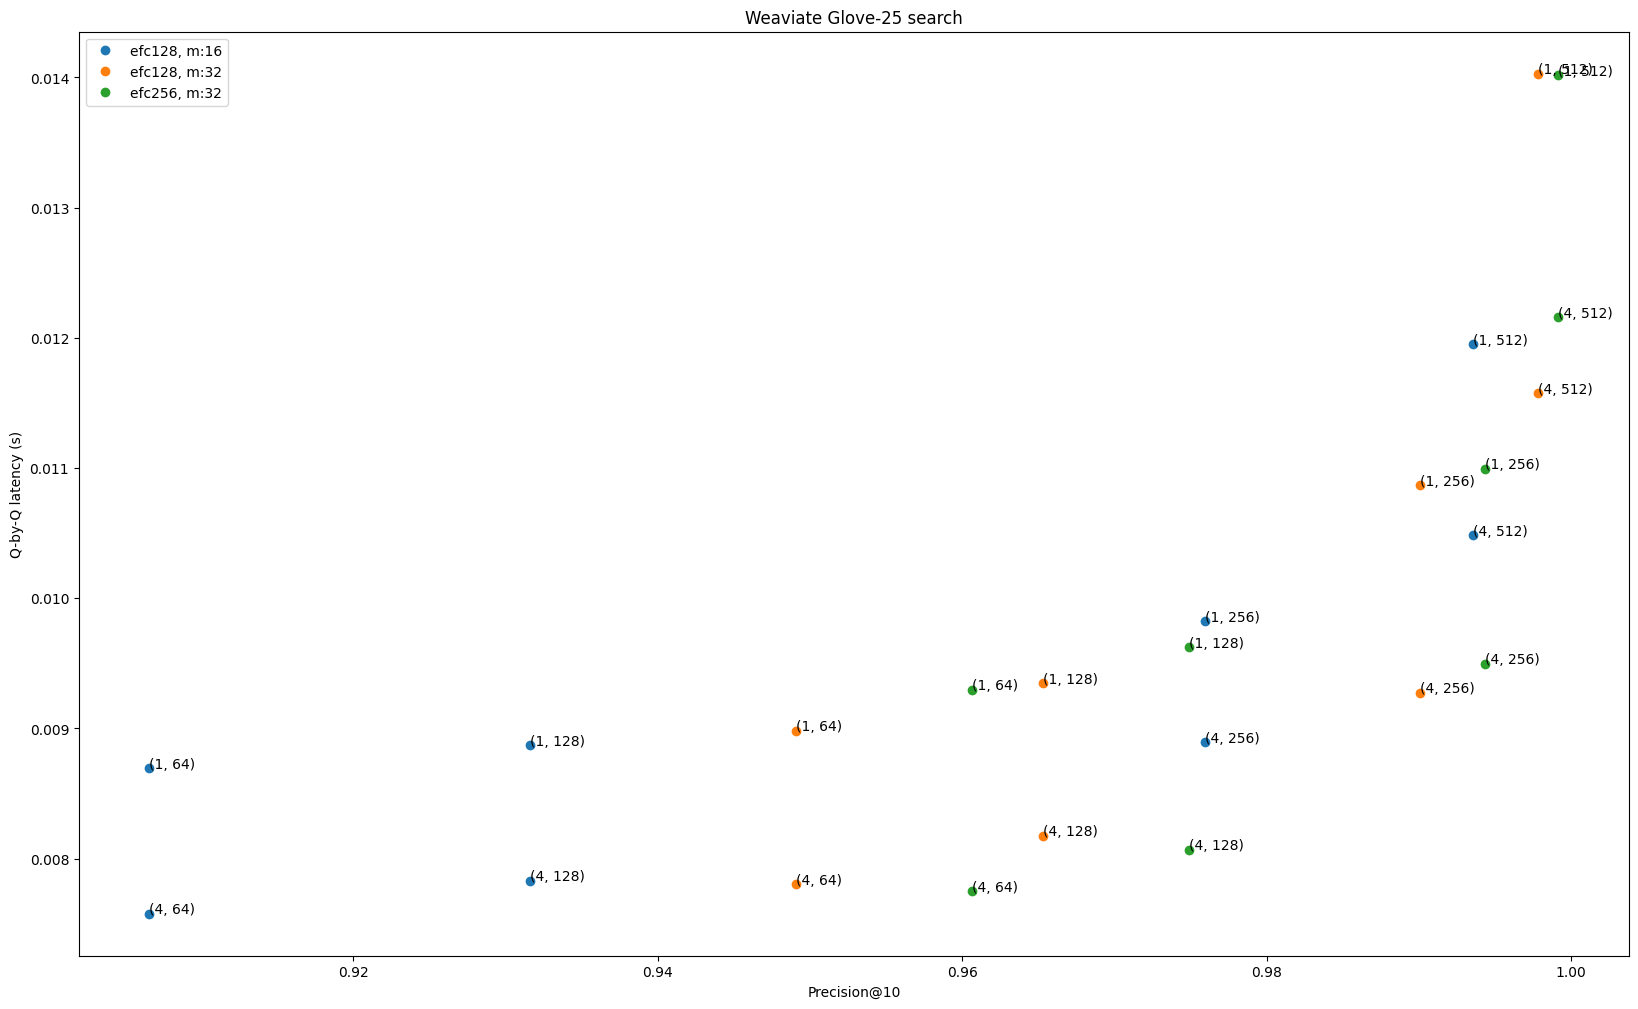

In [34]:
fig, ax = plt.subplots(figsize=(20, 12))
configs = weav_df.groupby(['efc', 'm']).count().index.to_list()
parallels = [1, 4]

for efc, m in configs:
    tmp = weav_df.copy()
    tmp = tmp[(tmp.dataset == 'glove') & (tmp.dim == 25)]
    tmp = tmp[(tmp.parallel.isin(parallels))]
    tmp = tmp[(tmp.efc == efc) & (tmp.m == m)]
    # tmp = tmp[tmp.parallel.isin(parallels)]
    ax.plot(tmp.mean_precisions, tmp.mean_time, 'o', label=f"efc{tmp.efc.values[0]}, m:{tmp.m.values[0]}")
    for _, row in tmp.iterrows():
        ax.annotate(f"{int(row.parallel), row.ef}" , (row.mean_precisions, row.mean_time))

ax.legend()
ax.set_title("Weaviate Glove-25 search")
ax.set_xlabel("Precision@10")
ax.set_ylabel("Q-by-Q latency (s)")

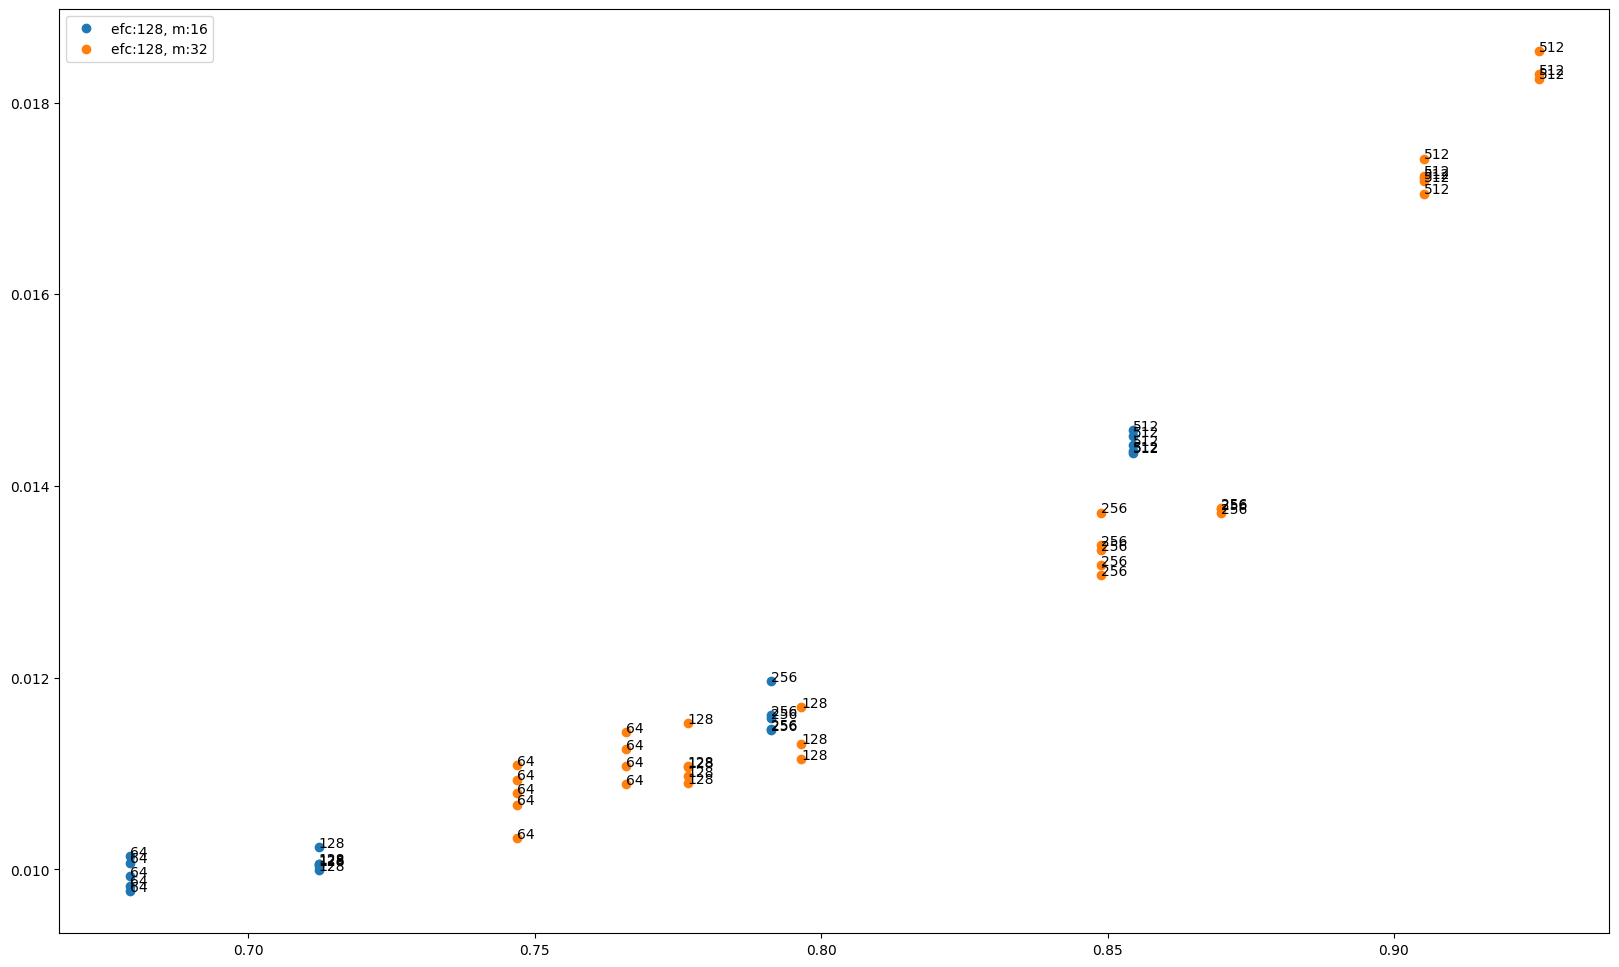

In [18]:
fig, ax = plt.subplots(figsize=(20, 12))
m_list = g100.m.unique()
for m in m_list:
    tmp = g100[g100.m == m]
    ax.plot(tmp.mean_precisions, tmp.mean_time,'o', label=f"efc:{tmp.efc.values[0]}, m:{tmp.m.values[0]}")
    for _, row in tmp.iterrows():
        ax.annotate(str(row.ef), (row.mean_precisions, row.mean_time))
ax.legend()